## K-nearest & Random Forest

---

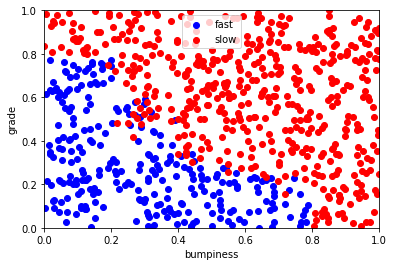

Random Forest
Training time: 0.081 s
Testing time:  0.0 s
acc:  0.92

k-Neighbors
Training time:  0.0 s
Testing time:  0.0 s
acc:  0.94


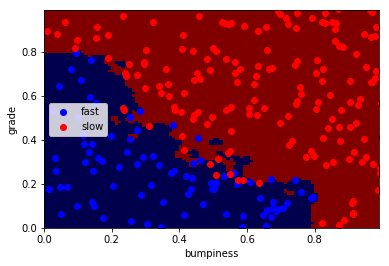

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################
from time import time

### random forest
from sklearn.ensemble import RandomForestClassifier
t0 = time()
clf = RandomForestClassifier()
clf.fit(features_train, labels_train)
print "Random Forest"
print "Training time:",round(time()-t0,3),"s"

t1 = time()
pred = clf.predict(features_test)
print "Testing time: ", round(time()-t1,3),"s"

print "acc: ", clf.score(features_test, labels_test)
print

### kneighbors
from sklearn.neighbors import KNeighborsClassifier
t2 = time()
clf = KNeighborsClassifier(n_neighbors=1, algorithm='auto', weights='distance')
clf.fit(features_train, labels_train)
print "k-Neighbors"
print "Training time: ",round(time()-t2,3),"s"

t3 = time()
pred = clf.predict(features_test)
print "Testing time: ", round(time()-t3,3),"s"

print "acc: ", clf.score(features_test, labels_test)

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass